In [1]:
import pandas as pd

In [2]:
# Training data
train_customers = pd.read_csv("../train/train_customers.csv")


In [3]:
train_customers.head() # Display the first few rows of the training customers dataset

,customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2/7/2023 19:16,2/7/2023 19:16
1,ZGFSYCZ,Male,NaN,1,1,EN,2/9/2023 12:04,2/9/2023 12:04
2,S2ALZFL,Male,NaN,0,1,EN,3/14/2023 18:31,3/14/2023 18:31
3,952DBJQ,Male,NaN,1,1,EN,3/15/2023 19:47,3/15/2023 19:47
4,1IX6FXS,Male,NaN,1,1,EN,3/15/2023 19:57,3/15/2023 19:57


In [4]:
train_customers.info() # Display information about the training orders dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34674 entries, 0 to 34673
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  34674 non-null  object 
 1   gender       22520 non-null  object 
 2   dob          3046 non-null   float64
 3   status       34674 non-null  int64  
 4   verified     34674 non-null  int64  
 5   language     21099 non-null  object 
 6   created_at   34674 non-null  object 
 7   updated_at   34674 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


In [5]:
train_customers['gender'].fillna('Unknown', inplace=True) # Fill missing values in gender with 'Unknown'


C:\Users\dybsb\AppData\Local\Temp\ipykernel_13812\2172428087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_customers['gender'].fillna('Unknown', inplace=True) # Fill missing values in gender with 'Unknown'


In [6]:
train_customers['gender']

0           Male
1           Male
2           Male
3           Male
4           Male
          ...   
34669    Unknown
34670    Unknown
34671    Unknown
34672    Unknown
34673    Unknown
Name: gender, Length: 34674, dtype: object

In [7]:
from datetime import datetime

# Only keep valid years (if it's year-like float)
train_customers['age'] = datetime.now().year - train_customers['dob']
train_customers['age'] = train_customers['age'].where(train_customers['dob'].notnull(), other=None)


In [8]:
train_customers.head()

,customer_id,gender,dob,status,verified,language,created_at,updated_at,age
0,TCHWPBT,Male,NaN,1,1,EN,2/7/2023 19:16,2/7/2023 19:16,NaN
1,ZGFSYCZ,Male,NaN,1,1,EN,2/9/2023 12:04,2/9/2023 12:04,NaN
2,S2ALZFL,Male,NaN,0,1,EN,3/14/2023 18:31,3/14/2023 18:31,NaN
3,952DBJQ,Male,NaN,1,1,EN,3/15/2023 19:47,3/15/2023 19:47,NaN
4,1IX6FXS,Male,NaN,1,1,EN,3/15/2023 19:57,3/15/2023 19:57,NaN


In [9]:
train_customers.drop(columns=['dob'], inplace=True)  # Drop the 'dob' column

In [10]:
train_customers.head()

,customer_id,gender,status,verified,language,created_at,updated_at,age
0,TCHWPBT,Male,1,1,EN,2/7/2023 19:16,2/7/2023 19:16,NaN
1,ZGFSYCZ,Male,1,1,EN,2/9/2023 12:04,2/9/2023 12:04,NaN
2,S2ALZFL,Male,0,1,EN,3/14/2023 18:31,3/14/2023 18:31,NaN
3,952DBJQ,Male,1,1,EN,3/15/2023 19:47,3/15/2023 19:47,NaN
4,1IX6FXS,Male,1,1,EN,3/15/2023 19:57,3/15/2023 19:57,NaN


In [11]:
train_customers['language'].fillna('Unknown', inplace=True) # Fill missing values in language with 'Unknown'

C:\Users\dybsb\AppData\Local\Temp\ipykernel_13812\293032966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_customers['language'].fillna('Unknown', inplace=True) # Fill missing values in language with 'Unknown'


In [12]:
train_customers.head()

,customer_id,gender,status,verified,language,created_at,updated_at,age
0,TCHWPBT,Male,1,1,EN,2/7/2023 19:16,2/7/2023 19:16,NaN
1,ZGFSYCZ,Male,1,1,EN,2/9/2023 12:04,2/9/2023 12:04,NaN
2,S2ALZFL,Male,0,1,EN,3/14/2023 18:31,3/14/2023 18:31,NaN
3,952DBJQ,Male,1,1,EN,3/15/2023 19:47,3/15/2023 19:47,NaN
4,1IX6FXS,Male,1,1,EN,3/15/2023 19:57,3/15/2023 19:57,NaN


Feature Extraction

In [13]:
from datetime import datetime

In [14]:
# Use errors='coerce' to handle invalid formats gracefully
train_customers['created_at'] = pd.to_datetime(train_customers['created_at'], format='mixed', dayfirst=True, errors='coerce')
train_customers['updated_at'] = pd.to_datetime(train_customers['updated_at'], format='mixed', dayfirst=True, errors='coerce')

# Days since account creation
train_customers['account_age_days'] = (datetime.now() - train_customers['created_at']).dt.days

In [15]:
train_customers.head()

,customer_id,gender,status,verified,language,created_at,updated_at,age,account_age_days
0,TCHWPBT,Male,1,1,EN,2023-07-02 19:16:00,2023-07-02 19:16:00,NaN,753.0
1,ZGFSYCZ,Male,1,1,EN,2023-09-02 12:04:00,2023-09-02 12:04:00,NaN,691.0
2,S2ALZFL,Male,0,1,EN,2023-03-14 18:31:00,2023-03-14 18:31:00,NaN,863.0
3,952DBJQ,Male,1,1,EN,2023-03-15 19:47:00,2023-03-15 19:47:00,NaN,862.0
4,1IX6FXS,Male,1,1,EN,2023-03-15 19:57:00,2023-03-15 19:57:00,NaN,862.0


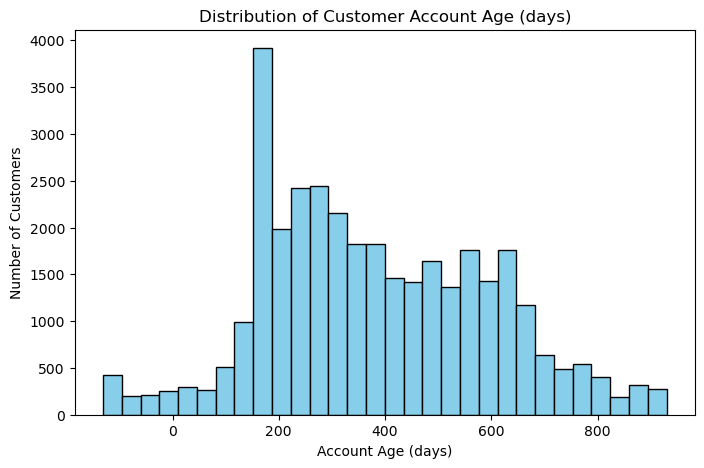

In [16]:
import matplotlib.pyplot as plt

# Plotting the distribution of account age in days
plt.figure(figsize=(8, 5))
plt.hist(train_customers['account_age_days'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Account Age (days)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Account Age (days)')
plt.show()

In [17]:
train_customers['last_active_days_ago'] = (datetime.now() - train_customers['updated_at']).dt.days

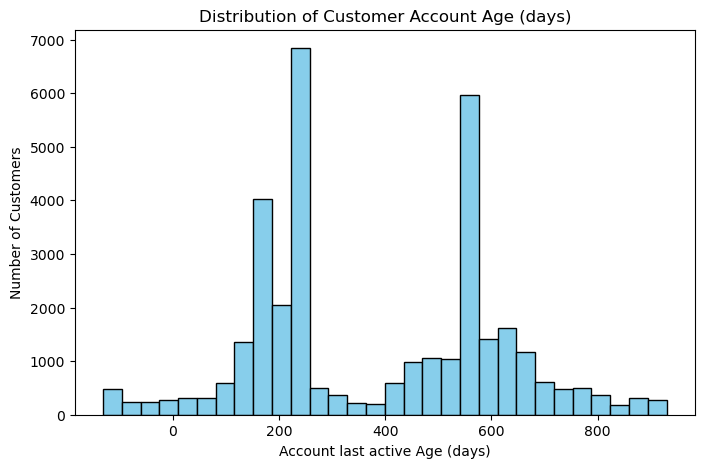

In [18]:
# Plotting the distribution of last active days ago

plt.figure(figsize=(8, 5))
plt.hist(train_customers['last_active_days_ago'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Account last active Age (days)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Account Age (days)')
plt.show()

In [19]:
train_customers['status'] = train_customers['status'].astype('category')
train_customers['verified'] = train_customers['verified'].astype('category')


In [20]:
train_customers['gender'].describe()

count     34674
unique       11
top        Male
freq      17815
Name: gender, dtype: object

C:\Users\dybsb\AppData\Local\Temp\ipykernel_13812\3811643851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_verified_counts = train_customers.groupby(['verified']).size()


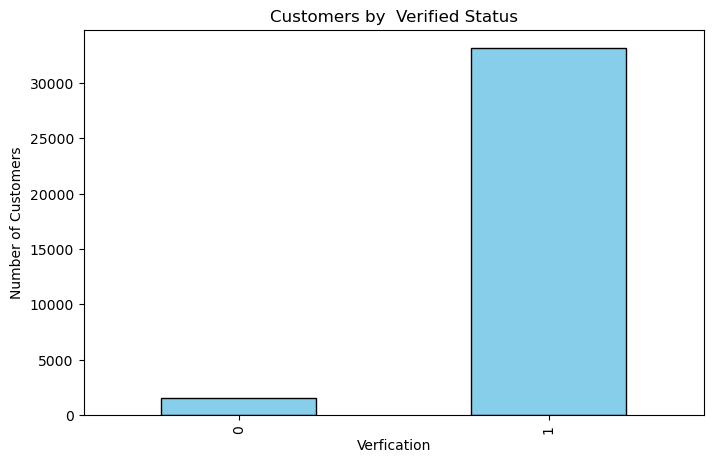

In [21]:
# Countplot for status and verified
status_verified_counts = train_customers.groupby(['verified']).size()

status_verified_counts.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.xlabel('Verfication')
plt.ylabel('Number of Customers')
plt.title('Customers by  Verified Status')
plt.show()

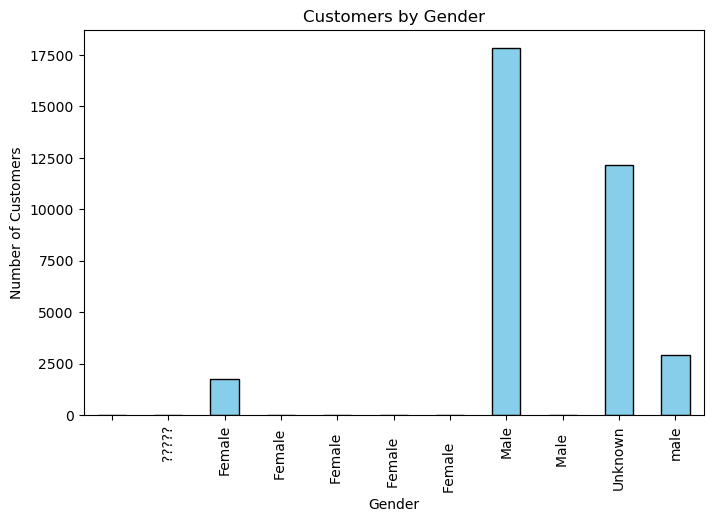

In [22]:


# Countplot for status and verified
status_verified_counts = train_customers.groupby(['gender']).size()

status_verified_counts.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customers by Gender')
plt.show()

In [23]:
train_customers['age_group'] = pd.cut(train_customers['age'], bins=[0, 18, 30, 45, 60, 100], labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])


In [24]:
train_customers.head()

,customer_id,gender,status,verified,language,created_at,updated_at,age,account_age_days,last_active_days_ago,age_group
0,TCHWPBT,Male,1,1,EN,2023-07-02 19:16:00,2023-07-02 19:16:00,NaN,753.0,753.0,NaN
1,ZGFSYCZ,Male,1,1,EN,2023-09-02 12:04:00,2023-09-02 12:04:00,NaN,691.0,691.0,NaN
2,S2ALZFL,Male,0,1,EN,2023-03-14 18:31:00,2023-03-14 18:31:00,NaN,863.0,863.0,NaN
3,952DBJQ,Male,1,1,EN,2023-03-15 19:47:00,2023-03-15 19:47:00,NaN,862.0,862.0,NaN
4,1IX6FXS,Male,1,1,EN,2023-03-15 19:57:00,2023-03-15 19:57:00,NaN,862.0,862.0,NaN


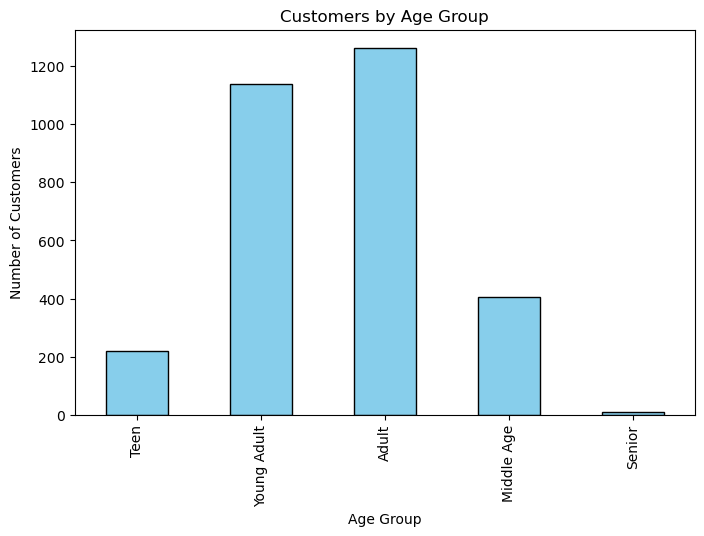

In [25]:
# Plotting the number of customers by age group
age_group_counts = train_customers['age_group'].value_counts().sort_index()

age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customers by Age Group')
plt.show()

C:\Users\dybsb\AppData\Local\Temp\ipykernel_13812\881854961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_status_counts = train_customers.groupby(['age_group', 'status']).size().unstack(fill_value=0)


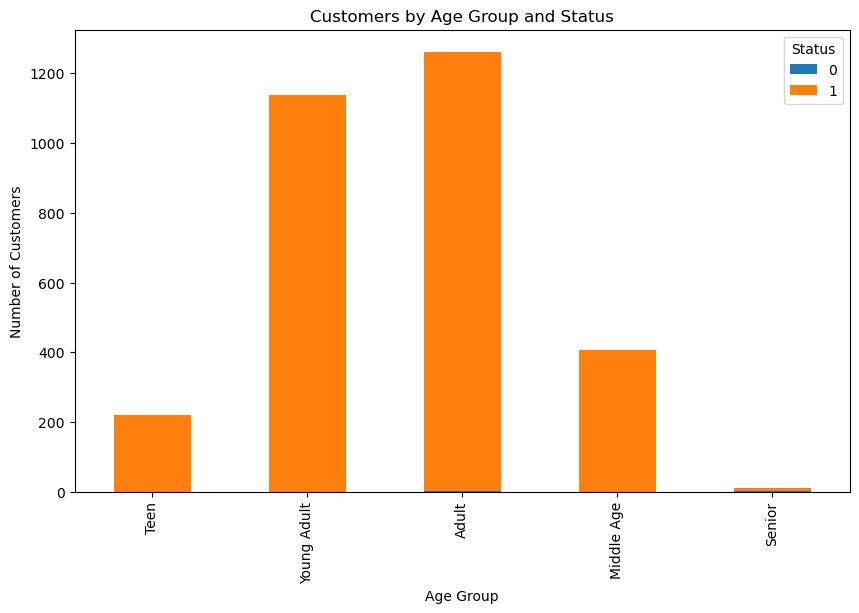

In [26]:

# Group by age_group and status, then plot
age_status_counts = train_customers.groupby(['age_group', 'status']).size().unstack(fill_value=0)

age_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customers by Age Group and Status')
plt.legend(title='Status')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# Fill missing numerical values
train_customers['age'].fillna(train_customers['age'].median(), inplace=True)

# One-hot encode multi-class categorical features
train_customers = pd.get_dummies(train_customers, columns=['gender', 'language', 'age_group'], drop_first=True)

C:\Users\dybsb\AppData\Local\Temp\ipykernel_13812\1731645490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_customers['age'].fillna(train_customers['age'].median(), inplace=True)


In [29]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
num_cols = ['account_age_days', 'last_active_days_ago', 'age']
train_customers[num_cols] = scaler.fit_transform(train_customers[num_cols])

In [30]:
# Drop customer_id before modeling
X = train_customers.drop(columns=['customer_id'])

In [31]:
X.head()

,status,verified,created_at,updated_at,age,account_age_days,last_active_days_ago,gender_?????,gender_Female,gender_Female,...,gender_Female,gender_Male,gender_Male,gender_Unknown,gender_male,language_Unknown,age_group_Young Adult,age_group_Adult,age_group_Middle Age,age_group_Senior
0,1,1,2023-07-02 19:16:00,2023-07-02 19:16:00,-0.010947,1.748214,1.638207,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1,2023-09-02 12:04:00,2023-09-02 12:04:00,-0.010947,1.456103,1.363443,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,0,1,2023-03-14 18:31:00,2023-03-14 18:31:00,-0.010947,2.266475,2.125691,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,2023-03-15 19:47:00,2023-03-15 19:47:00,-0.010947,2.261763,2.121259,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1,1,2023-03-15 19:57:00,2023-03-15 19:57:00,-0.010947,2.261763,2.121259,False,False,False,...,False,True,False,False,False,False,False,False,False,False
